In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.tools.monitor import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
from ibm_quantum_widgets import CircuitComposer

import time
from qiskit.providers.ibmq import least_busy

from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error, thermal_relaxation_error, depolarizing_error


%matplotlib inline



# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
#### Exact Time Dynamics
## Pauli matrices

S_x = np.matrix([[0.0,1.0],[1.0,0.0]])
S_y = np.matrix([[0.0,-1.0j],[1.0j,0.0]])
S_z = np.matrix([[1.0,0.0],[0.0,-1.0]])
Id = np.matrix([[1.0,0.0],[0.0,1.0]])

## Single qubit states 0 and 1 in computational basis
vect_0 = np.matrix([[1.0],[0.0]])
vect_1 = np.matrix([[0.0],[1.0]])



In [3]:
## The Schwinger model parameters
mu = 0.1
x = 0.6

In [4]:
## Unitarytime evolution operator under H

def U_exact(t,x,mu):
    H = (x/np.sqrt(2))*np.kron(S_x,S_x) + (x/np.sqrt(2))*np.kron(S_y,S_y) - mu*np.kron(S_z,S_z) +\
    x*(1.0 + (1.0/np.sqrt(2)))*np.kron(Id,S_x) - 0.5*np.kron(Id,S_z) - (1.0 + mu)*np.kron(S_z,Id) +\
    x*(1.0 - (1.0/np.sqrt(2)))*np.kron(S_z, S_x)
    return expm(-1.0j*t*H)


Probability 01 =  [0.0, 0.014279532227667731, 0.05569589690867274, 0.1201536813864746, 0.20137353020348137, 0.2916295751523156, 0.38263162083894314, 0.4664317568927078, 0.5362372307766643, 0.587031522308546, 0.6159394179540106, 0.6223130899996523, 0.607557410658409, 0.5747471148374631, 0.528110837539648, 0.4724649524394642, 0.4126738840283906, 0.3531961238930574, 0.2977513311140845, 0.2491191063043279]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

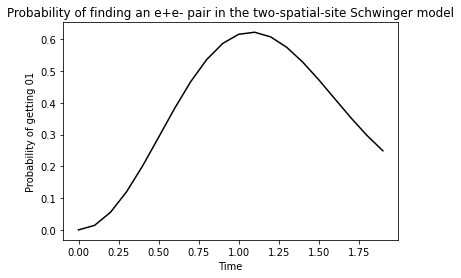

In [5]:
# time step
dt = 0.1
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_med = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_med.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_med)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_med, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

Probability 01 =  [0.0, 0.003592447706157227, 0.014279532227667731, 0.03179322850316771, 0.05569589690867274, 0.085393539689799, 0.1201536813864746, 0.15912722893536646, 0.20137353020348137, 0.24588774510263953, 0.2916295751523156, 0.33755236772877456, 0.38263162083894314, 0.4258919619063275, 0.4664317568927078, 0.5034446197240213, 0.5362372307766643, 0.5642430304523165, 0.587031522308546, 0.6043130922069544, 0.6159394179540106, 0.621899700840686, 0.6223130899996523, 0.6174177873078669, 0.607557410658409, 0.5931652542308994, 0.5747471148374631, 0.5528633539540508, 0.528110837539648, 0.5011053433547181, 0.4724649524394642, 0.44279485273160013, 0.4126738840283906, 0.38264305035528795, 0.3531961238930574, 0.324772369109148, 0.2977513311140845, 0.272449562080655, 0.2491191063043279, 0.2279475294537478]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

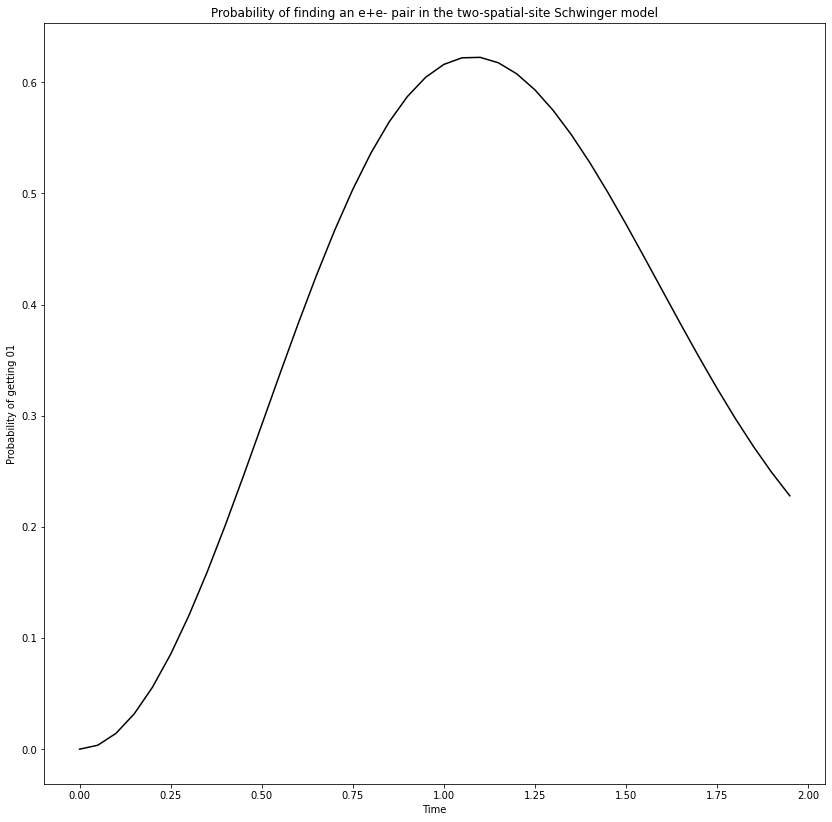

In [27]:
# time step (dt=0.01)
dt = 0.05
# number of time steps
NSteps = 40
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_small = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_small.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_small)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_small, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

Probability 01 =  [0.0, 0.05569589690867274, 0.20137353020348137, 0.38263162083894314, 0.5362372307766643, 0.6159394179540106, 0.607557410658409, 0.528110837539648, 0.4126738840283906, 0.2977513311140845]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

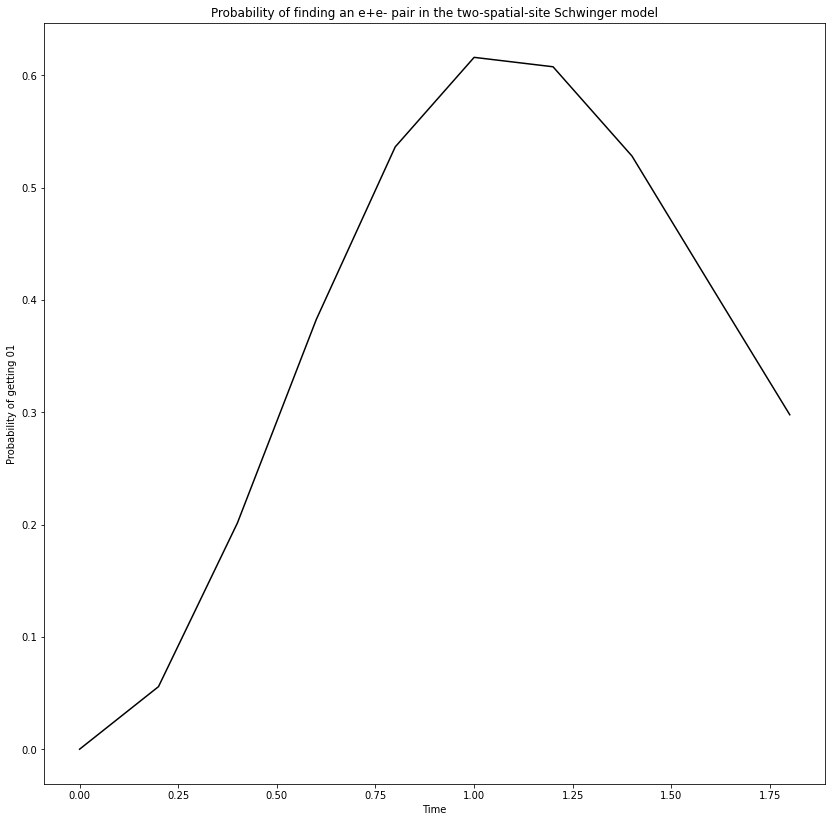

In [31]:
# time step (dt=0.5)
dt = 0.2
# number of time steps
NSteps = 10
nSteps = [n for n in range(NSteps)]

# initial state
v00 = np.kron(vect_0,vect_0)
# electron-positron pair state
v01 = np.kron(vect_0,vect_1)

P01_exact_large = []

for j in range(NSteps):
    t = nSteps[j]*dt
    res = np.transpose(v01)*U_exact(t,x,mu)*v00
    P01_exact_large.append(np.abs(res[0,0])**2)
    
print('Probability 01 = ', P01_exact_large)
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_large, 'black')
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

In [7]:
#### Trotterized Time Dynamics with Qiskit

# registers and quantum circuit
q = QuantumRegister(2,'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q,c)

# single first order Trotter step circuit
def U_trot(dt,q):
    circ.rxx(-2.0*(x/np.sqrt(2))*dt, 0, 1) 
    circ.sdg(q)
    circ.rxx(-2.0*(x/np.sqrt(2)*dt), 0, 1)
    circ.s(q)
    circ.h(q)
    circ.rxx(2.0*mu*dt, 0, 1) 
    circ.h(q)
    circ.rx(-2.0*x*(1.0 + (1.0/np.sqrt(2)))*dt, 1)
    circ.rz(1.0*dt, 1) 
    circ.rz(2.0*(1.0 + mu)*dt, 0)
    circ.h(0)
    circ.rxx(-2.0*x*(1.0 - (1.0/np.sqrt(2)))*dt, 0, 1) 
    circ.h(0)
    return circ

# approximate unitary propagator for t = dt*nSteps
def U_approx(circ, dt, nSteps, q):
    if nSteps>0:
        for ind in range(nSteps): 
            circ = U_trot(dt, q)  
    else: 
        circ = U_trot(0,q)
    return circ
    


Probability 01 =  [8.024582750190568e-32, 0.014313156771279416, 0.056026902699410464, 0.12129368419059881, 0.20398326507098963, 0.29639051486161255, 0.39011053854319555, 0.47696159768404267, 0.5498342224999619, 0.6033615686009527, 0.6343378778320995, 0.6418528090240887, 0.6271520713363146, 0.5932720056577452, 0.5445217666459916, 0.4858982665517088, 0.42251568446160365, 0.3591155418376728, 0.299699617579819, 0.24730186704778465]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

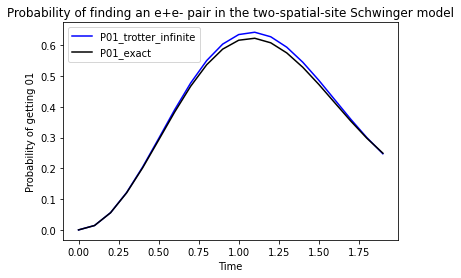

In [8]:
#### Infinite number of measurements
# time step
dt = 0.1
# number of time steps
NSteps = 20
nSteps = [n for n in range(NSteps)]
# number of measurements per task
nShots = 0

P01_trotter = []

# Select local simulator as backend device (statevector)
backend = Aer.get_backend('statevector_simulator')

# run 20 time steps
for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    job = execute(circ, backend, shots = nShots) 
    result = job.result() # collect run results
    outputstatee = result.get_statevector(circ) 
    P01_trotter.append(np.abs(outputstatee[2])**2) 

print('Probability 01 = ', P01_trotter)

Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_trotter, 'blue', label='P01_trotter_infinite')
plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')  
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')



Time per time step= [0.12285137176513672, 0.016565322875976562, 0.023469924926757812, 0.032500505447387695, 0.03421139717102051, 0.04044318199157715, 0.045952796936035156, 0.05209541320800781, 0.05884385108947754, 0.061849117279052734, 0.06683993339538574, 0.07193398475646973, 0.0773615837097168, 0.08519482612609863, 0.09123373031616211, 0.09635663032531738, 0.1144101619720459, 0.1126711368560791, 0.11361813545227051, 0.11749577522277832]

Total time= 1.4363210201263428

Probability 01 =  [0, 0.0126953125, 0.041015625, 0.1181640625, 0.2080078125, 0.287109375, 0.396484375, 0.4794921875, 0.53125, 0.5771484375, 0.630859375, 0.62890625, 0.634765625, 0.61328125, 0.5224609375, 0.4560546875, 0.4140625, 0.365234375, 0.2763671875, 0.2529296875]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model')

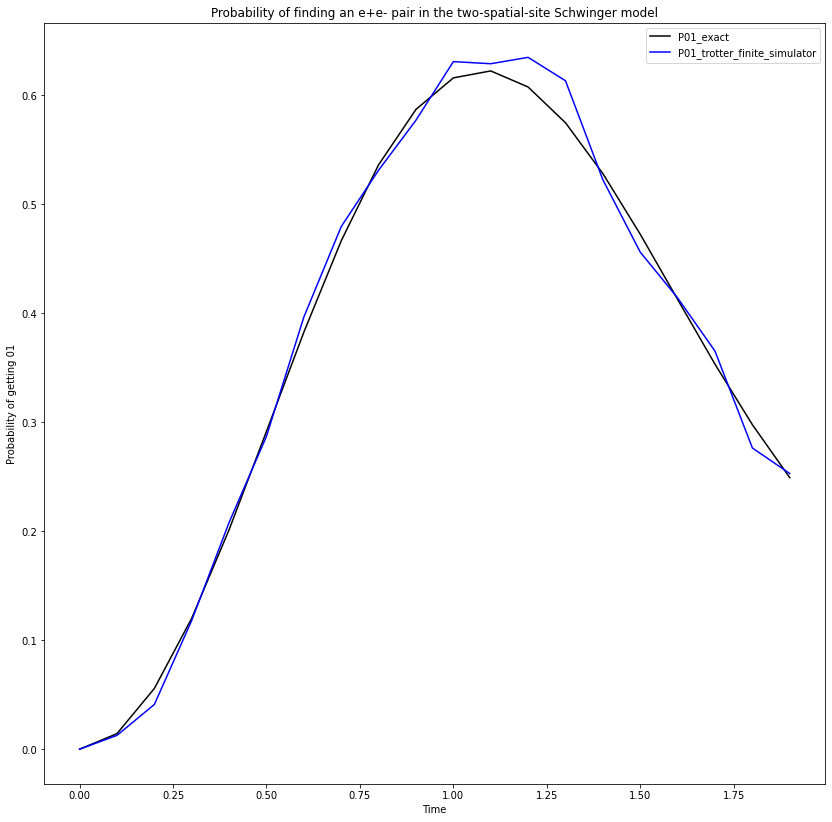

In [12]:
#### Finite measurements statistics on a quantum computer simulator
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 1024

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select Local simulator as a backend device 
backend = Aer.get_backend('qasm_simulator')

# run 20 time steps

timer_1_sim = time.time()

for j in range(NSteps):
    timer_2_sim = time.time()
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)
    
    
    job = execute(circ, backend, shots=nShots) # creation a quantum task and run 
    result = job.result() # collect run results
    count = result.get_counts(circ)
    
    try:
        var = count.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
    
    time_2_sim = time.time() - timer_2_sim
    time_per_step_sim.append(time_2_sim)
    
    
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model')


[{'00': 485, '01': 9, '10': 6}, {'00': 474, '01': 9, '10': 12, '11': 5}, {'00': 399, '01': 31, '10': 65, '11': 5}, {'00': 349, '01': 33, '10': 104, '11': 14}, {'00': 281, '01': 32, '10': 165, '11': 22}, {'00': 208, '01': 60, '10': 198, '11': 34}, {'00': 173, '01': 75, '10': 220, '11': 32}, {'00': 132, '01': 85, '10': 233, '11': 50}, {'00': 113, '01': 107, '10': 223, '11': 57}, {'00': 96, '01': 124, '10': 213, '11': 67}, {'00': 97, '01': 146, '10': 194, '11': 63}, {'00': 119, '01': 155, '10': 148, '11': 78}, {'00': 97, '01': 163, '10': 147, '11': 93}, {'00': 128, '01': 164, '10': 111, '11': 97}, {'00': 126, '01': 172, '10': 99, '11': 103}, {'00': 132, '01': 141, '10': 120, '11': 107}, {'00': 134, '01': 141, '10': 106, '11': 119}, {'00': 112, '01': 132, '10': 120, '11': 136}, {'00': 114, '01': 142, '10': 96, '11': 148}, {'00': 109, '01': 132, '10': 105, '11': 154}]
Time per time step= []

Total time= 307.3056447505951

Probability 01 =  [0.012, 0.024, 0.13, 0.20800000000000002, 0.33, 0.3

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_quito)')

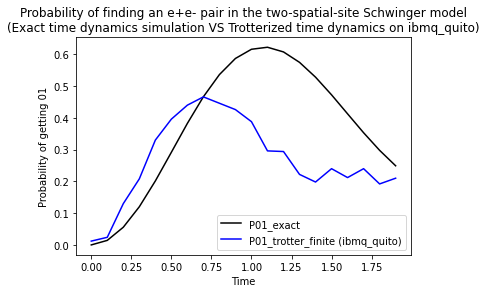

In [8]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.1)
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite (ibmq_quito)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n'
           '(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_quito)')

[{'00': 475, '01': 19, '10': 5, '11': 1}, {'00': 465, '01': 18, '10': 9, '11': 8}, {'00': 443, '01': 29, '10': 23, '11': 5}, {'00': 404, '01': 35, '10': 47, '11': 14}, {'00': 376, '01': 38, '10': 70, '11': 16}, {'00': 351, '01': 40, '10': 96, '11': 13}, {'00': 316, '01': 51, '10': 107, '11': 26}, {'00': 290, '01': 49, '10': 140, '11': 21}, {'00': 261, '01': 59, '10': 153, '11': 27}, {'00': 227, '01': 71, '10': 164, '11': 38}, {'00': 207, '01': 69, '10': 184, '11': 40}, {'00': 194, '01': 78, '10': 186, '11': 42}, {'00': 187, '01': 91, '10': 176, '11': 46}, {'00': 162, '01': 105, '10': 183, '11': 50}, {'00': 171, '01': 94, '10': 181, '11': 54}, {'00': 162, '01': 117, '10': 165, '11': 56}, {'00': 143, '01': 129, '10': 157, '11': 71}, {'00': 170, '01': 132, '10': 138, '11': 60}, {'00': 164, '01': 141, '10': 130, '11': 65}, {'00': 158, '01': 130, '10': 129, '11': 83}]

Total time= 173.19189763069153

Probability 01 =  [0.01, 0.018000000000000002, 0.046, 0.094, 0.14, 0.192, 0.214, 0.28, 0.30

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model :\nExact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (dt=0.01)')

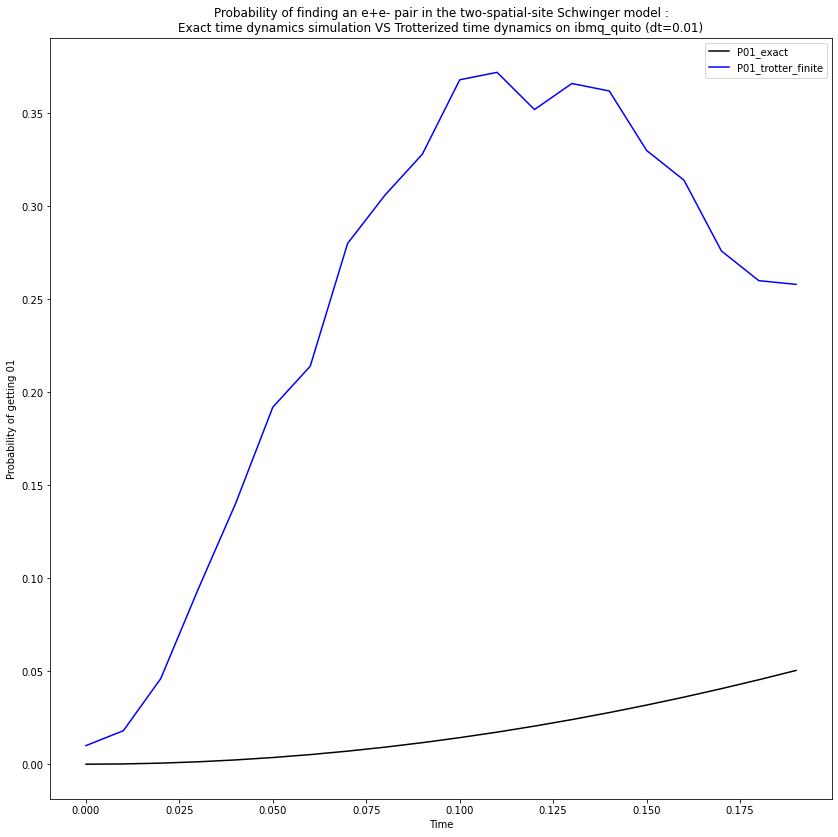

In [19]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.01)
# time step
dt = 0.01
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_small, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model :\n'
          'Exact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (dt=0.01)')

[{'00': 488, '01': 7, '10': 4, '11': 1}, {'00': 327, '01': 14, '10': 153, '11': 6}, {'00': 102, '01': 49, '10': 321, '11': 28}, {'00': 104, '01': 116, '10': 206, '11': 74}, {'00': 183, '01': 135, '10': 77, '11': 105}, {'00': 207, '01': 134, '10': 68, '11': 91}, {'00': 234, '01': 96, '10': 84, '11': 86}, {'00': 227, '01': 119, '10': 69, '11': 85}, {'00': 151, '01': 125, '10': 139, '11': 85}, {'00': 69, '01': 105, '10': 261, '11': 65}, {'00': 179, '01': 108, '10': 154, '11': 59}, {'00': 257, '01': 100, '10': 71, '11': 72}, {'00': 209, '01': 94, '10': 113, '11': 84}, {'00': 130, '01': 103, '10': 167, '11': 100}, {'00': 115, '01': 118, '10': 136, '11': 131}, {'00': 106, '01': 170, '10': 103, '11': 121}, {'00': 117, '01': 195, '10': 84, '11': 104}, {'00': 176, '01': 127, '10': 90, '11': 107}, {'00': 193, '01': 122, '10': 85, '11': 100}, {'00': 153, '01': 120, '10': 128, '11': 99}]
Time per time step= []

Total time= 572.2904839515686

Probability 01 =  [0.008, 0.306, 0.642, 0.41200000000000

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model :\nExact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (dt=0.5)')

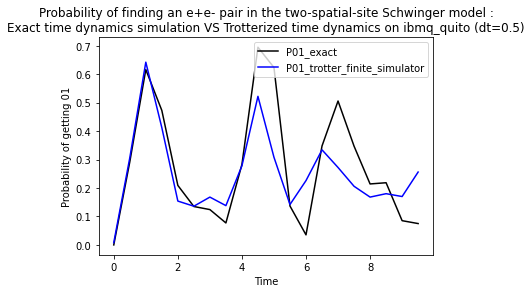

In [30]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.5)
# time step
dt = 0.5
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim = []
time_per_step_sim = []

# Select a backend device
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('Time per time step=', time_per_step_sim)
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_large, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_simulator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model :\n'
         'Exact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (dt=0.5)')

In [12]:
#### Finite measurements statistics on a quantum computer simulator (with basic bit-flip error noise model)

def Noisy_sim(p_reset, p_meas, p_gate1):

    # time step
    dt = 0.1
    # number of time steps
    NSteps=20
    nSteps=[n for n in range(NSteps)]
    # number of measurements per task
    nShots = 1024

    circ_list = []
    P01_trotter_finite_sim_noise = []

    ## Basic noise model : Basic bit-flip error noise model
    # Error probabilities
    #p_reset = 0.2
    #p_meas = 0.2
    #p_gate1 = 0

    # QuantumError objects
    error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

    #print(noise_bit_flip, '\n')
    ##

    # Create noisy simulator backend
    sim_noise = AerSimulator(noise_model=noise_bit_flip)


    # run 20 time steps
    timer_1_sim = time.time()

    for j in range(NSteps):
        circ = QuantumCircuit(2,2) # initialize a quantum circuit
        circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
        circ.z(q)
        circ.measure(range(2),range(2)) # mesure 
        # Transpile circuit for noisy basis gates
        circ_tnoise = transpile(circ, sim_noise)
        circ_list.append(circ_tnoise)

    timer_1_sim = time.time()

    # run the noisy simulation
    result_bit_flip = sim_noise.run(circ_list, nshots=nShots).result()
    counts_bit_flip = result_bit_flip.get_counts()
    #print(counts_bit_flip)

    for k in range(NSteps):
        count_var = counts_bit_flip[k]
        try:
            var = count_var.get('10')
            P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
        except:
            P01_trotter_finite_sim_noise.append(0)
    
    #time_1_sim = time.time() - timer_1_sim
    #print('\nTotal time=', time_1_sim)
    print('\nProbability 01 = ', P01_trotter_finite_sim_noise)

    return P01_trotter_finite_sim_noise

#plt.plot(Time, diff_noisy_not, 'black')
#plt.xlabel('Time')
#plt.ylabel('Difference between noisy simulation and not')
#plt.title('Evolution with time of the probability difference between noisy simulation and not')


[{'00': 500}, {'10': 9, '00': 491}, {'00': 467, '10': 33}, {'00': 430, '10': 70}, {'01': 2, '10': 94, '00': 404}, {'01': 5, '00': 334, '10': 161}, {'01': 10, '10': 208, '00': 282}, {'11': 1, '01': 17, '00': 240, '10': 242}, {'11': 3, '01': 27, '00': 199, '10': 271}, {'00': 156, '10': 303, '01': 41}, {'11': 2, '01': 45, '00': 109, '10': 344}, {'11': 9, '00': 102, '10': 335, '01': 54}, {'01': 88, '00': 85, '10': 312, '11': 15}, {'11': 18, '01': 94, '00': 92, '10': 296}, {'11': 15, '00': 84, '10': 301, '01': 100}, {'11': 30, '01': 106, '00': 111, '10': 253}, {'11': 40, '01': 143, '10': 201, '00': 116}, {'11': 52, '01': 139, '10': 163, '00': 146}, {'11': 40, '01': 119, '10': 159, '00': 182}, {'01': 135, '11': 52, '00': 196, '10': 117}]

Probability 01 =  [0, 0.018000000000000002, 0.066, 0.14, 0.188, 0.322, 0.41600000000000004, 0.484, 0.542, 0.606, 0.6880000000000001, 0.67, 0.624, 0.592, 0.602, 0.506, 0.402, 0.326, 0.318, 0.234]


Text(0, 0.5, 'P01')

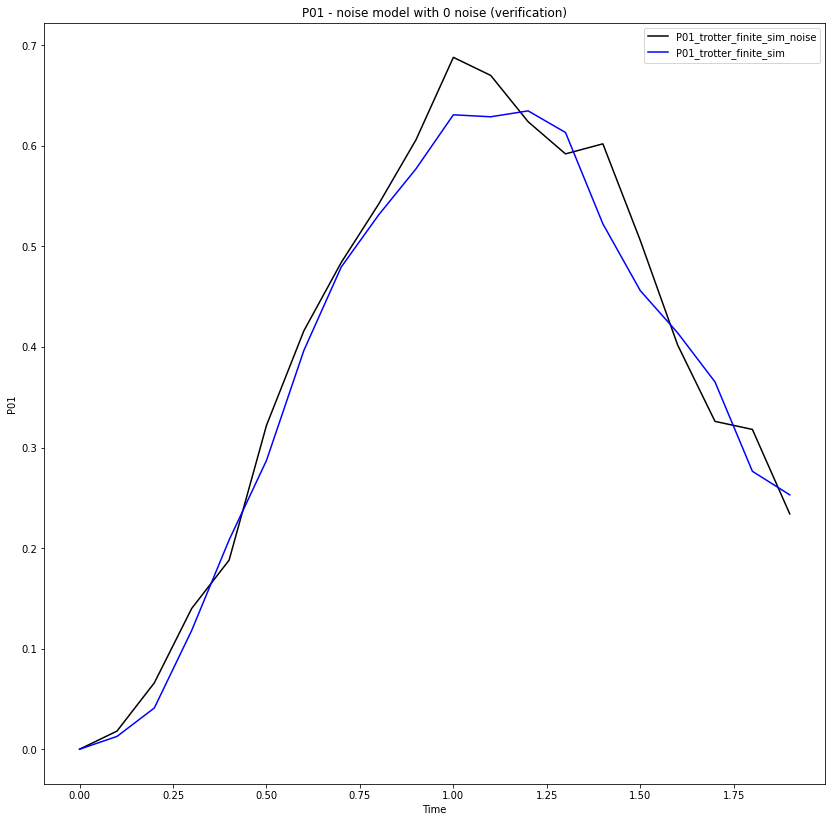

In [14]:
#### Finite measurements statistics on a quantum computer simulator (with basic bit-flip error noise model)

# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_sim_noise = []

## Basic noise model : Basic bit-flip error noise model
# Error probabilities
p_reset = 0
p_meas = 0
p_gate1 = 0

    # QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

    #print(noise_bit_flip, '\n')
    ##

    # Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noise_bit_flip)


    # run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
        # Transpile circuit for noisy basis gates
    circ_tnoise = transpile(circ, sim_noise)
    circ_list.append(circ_tnoise)

timer_1_sim = time.time()

    # run the noisy simulation
result_bit_flip = sim_noise.run(circ_list, shots=nShots).result()
counts_bit_flip = result_bit_flip.get_counts()
print(counts_bit_flip)

for k in range(NSteps):
    count_var = counts_bit_flip[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim_noise.append(0)
    
print('\nProbability 01 = ', P01_trotter_finite_sim_noise)

plt.plot(Time, P01_trotter_finite_sim_noise, 'black', label='P01_trotter_finite_sim_noise')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite_sim')
plt.legend()
plt.title('P01 - noise model with 0 noise (verification)')
plt.xlabel('Time')
plt.ylabel('P01')



Probability 01 =  [0, 0.0078125, 0.0595703125, 0.130859375, 0.21044921875, 0.29150390625, 0.3974609375, 0.47802734375, 0.53564453125, 0.60205078125, 0.64599609375, 0.64453125, 0.6298828125, 0.59326171875, 0.5380859375, 0.4990234375, 0.40869140625, 0.3671875, 0.29345703125, 0.25830078125]

Probability 01 =  [0.08447265625, 0.099609375, 0.1123046875, 0.171875, 0.22900390625, 0.30517578125, 0.3916015625, 0.43017578125, 0.47314453125, 0.51953125, 0.52685546875, 0.537109375, 0.54248046875, 0.4892578125, 0.46923828125, 0.41162109375, 0.3662109375, 0.33154296875, 0.279296875, 0.24609375]

Probability 01 =  [0.1611328125, 0.17626953125, 0.18603515625, 0.21484375, 0.2529296875, 0.31396484375, 0.349609375, 0.38720703125, 0.416015625, 0.45556640625, 0.45166015625, 0.4482421875, 0.43505859375, 0.44091796875, 0.3740234375, 0.37353515625, 0.3203125, 0.2958984375, 0.2822265625, 0.24755859375]

Probability 01 =  [0.2236328125, 0.208984375, 0.22509765625, 0.248046875, 0.27783203125, 0.2919921875, 0.32

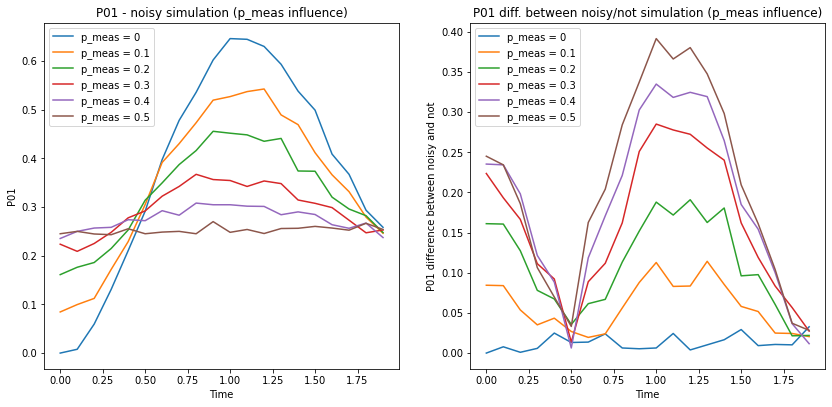


Probability 01 =  [0, 0.017578125, 0.05810546875, 0.1328125, 0.19873046875, 0.29833984375, 0.373046875, 0.4775390625, 0.53564453125, 0.6005859375, 0.619140625, 0.64404296875, 0.623046875, 0.57763671875, 0.5419921875, 0.4990234375, 0.40380859375, 0.35546875, 0.30810546875, 0.2470703125]

Probability 01 =  [0, 0.0107421875, 0.05078125, 0.12255859375, 0.203125, 0.29931640625, 0.3798828125, 0.47119140625, 0.54541015625, 0.60595703125, 0.634765625, 0.64794921875, 0.6416015625, 0.58837890625, 0.54833984375, 0.462890625, 0.42822265625, 0.3291015625, 0.294921875, 0.25]

Probability 01 =  [0, 0.01513671875, 0.056640625, 0.123046875, 0.193359375, 0.28759765625, 0.400390625, 0.48193359375, 0.58154296875, 0.6025390625, 0.6455078125, 0.65771484375, 0.63232421875, 0.5849609375, 0.556640625, 0.47607421875, 0.42236328125, 0.36474609375, 0.30322265625, 0.240234375]

Probability 01 =  [0, 0.01025390625, 0.05419921875, 0.119140625, 0.2041015625, 0.29052734375, 0.39013671875, 0.45556640625, 0.56689453125

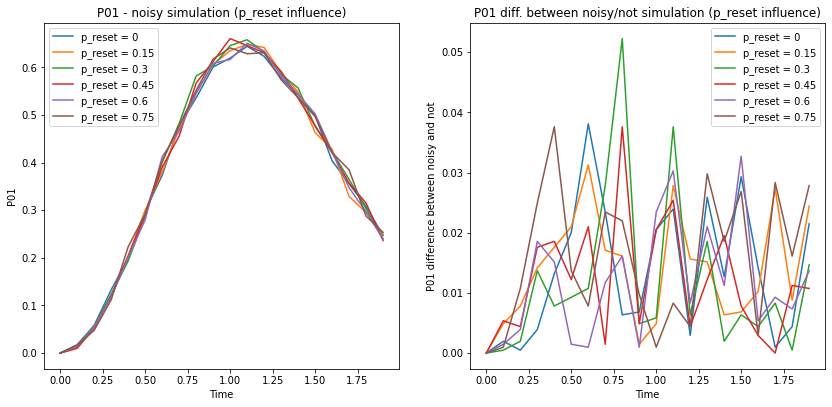


Probability 01 =  [0, 0.01416015625, 0.0546875, 0.11328125, 0.20849609375, 0.30224609375, 0.39208984375, 0.48828125, 0.5390625, 0.59375, 0.6298828125, 0.63525390625, 0.61962890625, 0.59716796875, 0.556640625, 0.474609375, 0.4189453125, 0.3681640625, 0.3154296875, 0.23291015625]

Probability 01 =  [0.00244140625, 0.02099609375, 0.06787109375, 0.13671875, 0.21728515625, 0.2744140625, 0.33740234375, 0.4111328125, 0.43505859375, 0.49365234375, 0.50830078125, 0.509765625, 0.47509765625, 0.46044921875, 0.451171875, 0.4072265625, 0.3916015625, 0.35791015625, 0.322265625, 0.28515625]

Probability 01 =  [0.0068359375, 0.033203125, 0.07861328125, 0.1474609375, 0.2119140625, 0.25634765625, 0.333984375, 0.3583984375, 0.39453125, 0.3974609375, 0.42724609375, 0.41064453125, 0.3955078125, 0.375, 0.35888671875, 0.3564453125, 0.3291015625, 0.30078125, 0.318359375, 0.29345703125]

Probability 01 =  [0.0048828125, 0.037109375, 0.0888671875, 0.14453125, 0.19921875, 0.25048828125, 0.30859375, 0.3491210937

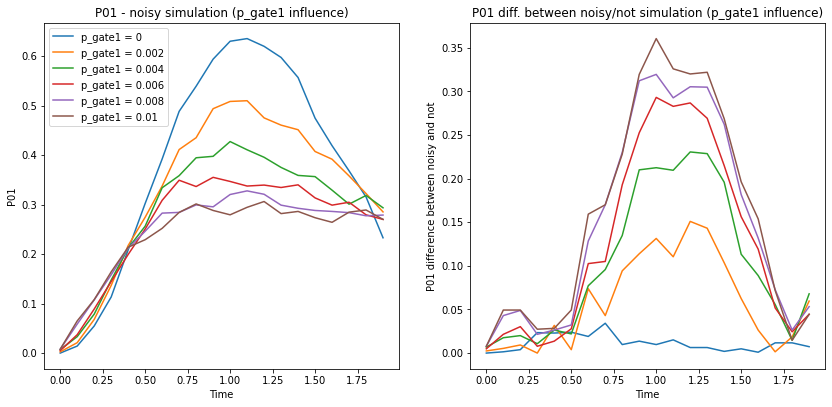

In [25]:
#### Finite measurements statistics on a quantum computer simulator (with basic bit-flip error noise model)
## Basic noise model : Basic bit-flip error noise model
# Error probabilities
p_meas = 0
p_reset = 0
p_gate1 = 0

# Variation of the error probabilities
step_meas = 0.1
step_reset = 0.15
step_gate1 = 0.002
nCalc = 6
n = 1

for j in range(3*nCalc):
    
    # time step
    dt = 0.1
    # number of time steps
    NSteps=20
    nSteps=[n for n in range(NSteps)]
    # number of measurements per task
    nShots = 2048
    
    circ_list = []
    P01_trotter_finite_sim_noise = []
    
        # QuantumError objects
    error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

        # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

        #print(noise_bit_flip, '\n')
        # Create noisy simulator backend
    sim_noise = AerSimulator(noise_model=noise_bit_flip)


        # run 20 time steps

    for j in range(NSteps):
        circ = QuantumCircuit(2,2) # initialize a quantum circuit
        circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
        circ.z(q)
        circ.measure(range(2),range(2)) # mesure 
        # Transpile circuit for noisy basis gates
        circ_tnoise = transpile(circ, sim_noise)
        circ_list.append(circ_tnoise)


        # run the noisy simulation
    result_bit_flip = sim_noise.run(circ_list, shots=nShots).result()
    counts_bit_flip = result_bit_flip.get_counts()
        #print(counts_bit_flip)
    
    diff_noisy_not = np.zeros(NSteps)

    for k in range(NSteps):
        count_var = counts_bit_flip[k]
        try:
            var = count_var.get('10')
            P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
        except:
            P01_trotter_finite_sim_noise.append(0)
        
        diff_noisy_not[k] = abs(P01_trotter_finite_sim[k] - P01_trotter_finite_sim_noise[k])
    
    print('\nProbability 01 = ', P01_trotter_finite_sim_noise)
    
    if n<=nCalc:
        lab = 'p_meas = ' + str(round(p_meas, 3)) 
        plt.rcParams["figure.figsize"] = (14,14)
        # Noisy simulation
        plt.subplot(2,2,1)
        plt.plot(Time, P01_trotter_finite_sim_noise, label=lab)
        plt.title('P01 - noisy simulation (p_meas influence)')
        plt.xlabel('Time')
        plt.ylabel('P01')
        plt.legend()
        # Difference between noisy and not
        plt.subplot(2,2,2)
        plt.plot(Time, diff_noisy_not, label=lab)
        plt.title('P01 diff. between noisy/not simulation (p_meas influence)')
        plt.xlabel('Time')
        plt.ylabel('P01 difference between noisy and not')
        plt.legend()
        # Error probability augmentation
        p_meas += step_meas
    if n==nCalc:
        plt.show()
        p_meas = 0
    if nCalc<n<=2*nCalc:
        lab = 'p_reset = ' + str(round(p_reset,3))
        plt.rcParams["figure.figsize"] = (14,14)
        # Noisy simulation
        plt.subplot(2,2,1)
        plt.plot(Time, P01_trotter_finite_sim_noise, label=lab)
        plt.title('P01 - noisy simulation (p_reset influence)')
        plt.xlabel('Time')
        plt.ylabel('P01')
        plt.legend()
        # Difference between noisy and not
        plt.subplot(2,2,2)
        plt.plot(Time, diff_noisy_not, label=lab)
        plt.title('P01 diff. between noisy/not simulation (p_reset influence)')
        plt.xlabel('Time')
        plt.ylabel('P01 difference between noisy and not')
        plt.legend()
        # Error probability augmentation
        p_reset += step_reset
    if n==2*nCalc:
        plt.show()
        p_reset = 0
    if 2*nCalc<n<=3*nCalc:
        lab = 'p_gate1 = ' + str(round(p_gate1,3))
        plt.rcParams["figure.figsize"] = (14,14)
        # Noisy simulation
        plt.subplot(2,2,1)
        plt.plot(Time, P01_trotter_finite_sim_noise, label=lab)
        plt.title('P01 - noisy simulation (p_gate1 influence)')
        plt.xlabel('Time')
        plt.ylabel('P01')
        plt.legend()
        # Difference between noisy and not
        plt.subplot(2,2,2)
        plt.plot(Time, diff_noisy_not, label=lab)
        plt.title('P01 diff. between noisy/not simulation (p_gate1 influence)')
        plt.xlabel('Time')
        plt.ylabel('P01 difference between noisy and not')
        # Error probability augmentation
        p_gate1 += step_gate1
    if n==3*nCalc:
        plt.show()
        
    n += 1
    


Probability 01 =  [0, 0.018000000000000002, 0.06, 0.10400000000000001, 0.17400000000000002, 0.27, 0.278, 0.376, 0.372, 0.424, 0.406, 0.404, 0.422, 0.368, 0.378, 0.34, 0.316, 0.27, 0.296, 0.28600000000000003]

Probability 01 =  [0, 0.024, 0.054, 0.134, 0.152, 0.23800000000000002, 0.266, 0.308, 0.38, 0.36, 0.358, 0.326, 0.354, 0.306, 0.338, 0.334, 0.304, 0.324, 0.27, 0.274]

Probability 01 =  [0, 0.036000000000000004, 0.088, 0.108, 0.2, 0.222, 0.23, 0.298, 0.332, 0.322, 0.368, 0.29, 0.324, 0.33, 0.308, 0.26, 0.28, 0.316, 0.274, 0.28]

Probability 01 =  [0, 0.024, 0.076, 0.13, 0.152, 0.222, 0.196, 0.252, 0.252, 0.25, 0.252, 0.234, 0.252, 0.252, 0.256, 0.298, 0.226, 0.3, 0.274, 0.256]

Probability 01 =  [0, 0.032, 0.064, 0.098, 0.116, 0.138, 0.156, 0.146, 0.146, 0.166, 0.162, 0.162, 0.136, 0.134, 0.156, 0.158, 0.122, 0.164, 0.156, 0.148]


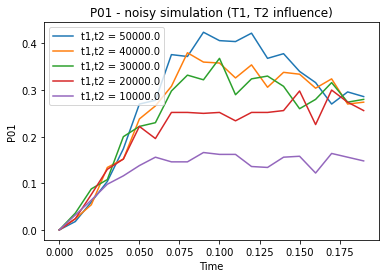

In [20]:
#### Finite measurements statistics on a quantum computer simulator (with T1 and T2 thermal relaxation)

# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

t1_0 = 50e3
t1_1 = 50e3
t2_0 = 50e3
t2_1 = 50e3
t_step = 10e3

while t1_0 >0 and t1_1 >0 and t2_0 >0 and t2_1>0:
    circ_list = []
    P01_trotter_finite_sim_noise = []

    for j in range(NSteps):
        circ = QuantumCircuit(2,2) # initialize a quantum circuit
        circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
        circ.z(q)
        circ.measure(range(2),range(2)) # mesure 
        circ_list.append(circ)


    # T1 and T2 values for qubits 0-1
    T1s = np.array([t1_0, t1_1]) # nanosec
    T2s = np.array([t2_0, t2_1])  # nanosec


    # Instruction times (in nanoseconds)
    time_u1 = 0   # virtual gate
    time_u2 = 50  # (single X90 pulse)
    time_u3 = 100 # (two X90 pulses)
    time_cx = 300
    time_reset = 10000  # 1 microsecond
    time_measure = 10000 # 1 microsecond

    # QuantumError objects
    errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                    for t1, t2 in zip(T1s, T2s)]
    errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                      for t1, t2 in zip(T1s, T2s)]
    errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
                  for t1, t2 in zip(T1s, T2s)]
    errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
                  for t1, t2 in zip(T1s, T2s)]
    errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
                  for t1, t2 in zip(T1s, T2s)]
    errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
                 thermal_relaxation_error(t1b, t2b, time_cx))
                  for t1a, t2a in zip(T1s, T2s)]
                   for t1b, t2b in zip(T1s, T2s)]

    # Add errors to noise model
    noise_thermal = NoiseModel()
    for j in range(2):
        noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
        noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
        noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
        noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
        noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
        for k in range(2):
            noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

    #print(noise_thermal)

    # Run the noisy simulation
    sim_thermal = AerSimulator(noise_model=noise_thermal)

    # Transpile circuit for noisy basis gates
    circ_tthermal = transpile(circ_list, sim_thermal)

    # Run and get counts
    result_thermal = sim_thermal.run(circ_tthermal, shots=nShots).result()
    counts_thermal = result_thermal.get_counts()
    #print(counts_thermal)

    for k in range(NSteps):
        count_var = counts_thermal[k]
        try:
            var = count_var.get('10')
            P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
        except:
            P01_trotter_finite_sim_noise.append(0)

    print('\nProbability 01 = ', P01_trotter_finite_sim_noise)

    lab = 't1,t2 = ' + str(round(t1_0,3))
    plt.plot(Time, P01_trotter_finite_sim_noise, label=lab)

    t1_0 -= t_step
    t1_1 -= t_step
    t2_0 -= t_step
    t2_1 -= t_step


plt.title('P01 - noisy simulation (T1, T2 influence)')
plt.xlabel('Time')
plt.ylabel('P01')
plt.legend()
plt.show()

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'u3', 'cx', 'reset', 'measure']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('reset', [0]), ('reset', [1]), ('measure', [0]), ('measure', [1]), ('u2', [0]), ('u2', [1]), ('u3', [0]), ('u3', [1]), ('cx', [0, 0]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 1])]
[{'00': 500}, {'11': 2, '10': 6, '00': 483, '01': 9}, {'11': 11, '01': 11, '00': 458, '10': 20}, {'11': 9, '10': 27, '00': 448, '01': 16}, {'01': 24, '10': 28, '00': 432, '11': 16}, {'01': 22, '11': 12, '00': 431, '10': 35}, {'11': 18, '10': 43, '00': 406, '01': 33}, {'11': 16, '10': 50, '00': 397, '01': 37}, {'11': 24, '01': 38, '00': 385, '10': 53}, {'11': 28, '01': 47, '00': 378, '10': 47}, {'01': 35, '11': 31, '10': 68, '00': 366}, {'11': 34, '10': 64, '00': 353, '01': 49}, {'01': 50, '10': 67, '00': 343, '11': 40}, {'11': 36, '10': 81, '00': 322, '01': 61}, {'11': 47, '10': 87, '00': 306, '01': 60}, {'01': 59, '11': 42, '10': 86, '

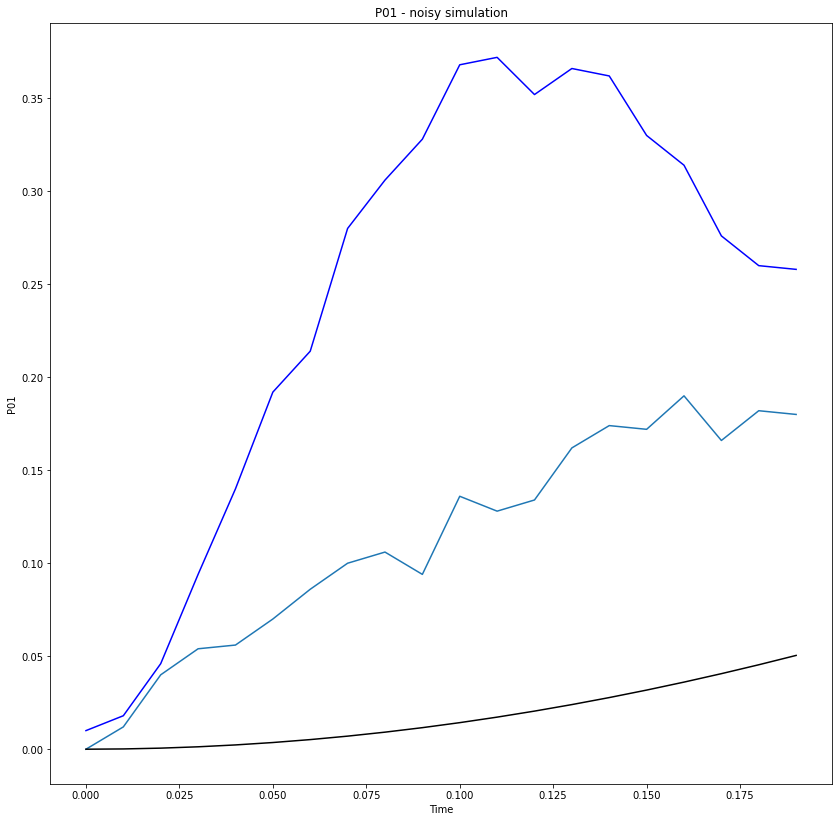

In [20]:
#### Finite measurements statistics on a quantum computer simulator (with T1 and T2 thermal relaxation)

# time step
dt = 0.01
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

t1_0 = 50e3
t1_1 = 50e3
t2_0 = 50e3
t2_1 = 50e3
t_step = 10e3

circ_list = []
P01_trotter_finite_sim_noise = []

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)


# T1 and T2 values for qubits 0-1
T1s = np.array([t1_0, t1_1]) # nanosec
T2s = np.array([t2_0, t2_1])  # nanosec


# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(2):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(2):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal)

# Run the noisy simulation
sim_thermal = AerSimulator(noise_model=noise_thermal)

# Transpile circuit for noisy basis gates
circ_tthermal = transpile(circ_list, sim_thermal)

# Run and get counts
result_thermal = sim_thermal.run(circ_tthermal, shots=nShots).result()
counts_thermal = result_thermal.get_counts()
print(counts_thermal)

for k in range(NSteps):
    count_var = counts_thermal[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim_noise.append(0)
    
print('\nProbability 01 = ', P01_trotter_finite_sim_noise)

plt.plot(Time, P01_trotter_finite_sim_noise, label='P01_trotter_finite_noisy_sim')
plt.plot(Time, P01_exact_small, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite (ibmq_quito)')
plt.title('P01 - noisy simulation')
plt.xlabel('Time')
plt.ylabel('P01')
plt.show()


Probability 01 =  [0, 0.01, 0.09, 0.13, 0.28, 0.28, 0.34, 0.38, 0.44, 0.42, 0.55, 0.48, 0.41000000000000003, 0.48, 0.42, 0.43, 0.37, 0.35000000000000003, 0.33, 0.3, 0.28, 0.24, 0.29, 0.27, 0.34, 0.24, 0.23, 0.29, 0.26, 0.28, 0.3, 0.23, 0.29, 0.31, 0.32, 0.27, 0.35000000000000003, 0.3, 0.25, 0.35000000000000003, 0.27, 0.24, 0.4, 0.35000000000000003, 0.36, 0.23, 0.25, 0.31, 0.19, 0.32, 0.29, 0.25, 0.29, 0.24, 0.26, 0.31, 0.29, 0.26, 0.24, 0.33]

Probability 01 =  [0, 0.015000000000000001, 0.08, 0.13333333333333333, 0.22833333333333336, 0.3066666666666667, 0.3383333333333334, 0.41000000000000003, 0.43333333333333335, 0.48000000000000004, 0.4316666666666667, 0.4716666666666667, 0.45833333333333337, 0.43000000000000005, 0.43500000000000005, 0.375, 0.36000000000000004, 0.3666666666666667, 0.31, 0.305, 0.30000000000000004, 0.2833333333333333, 0.2783333333333334, 0.26, 0.255, 0.29833333333333334, 0.2916666666666667, 0.27, 0.2366666666666667, 0.29000000000000004, 0.26833333333333337, 0.2850000

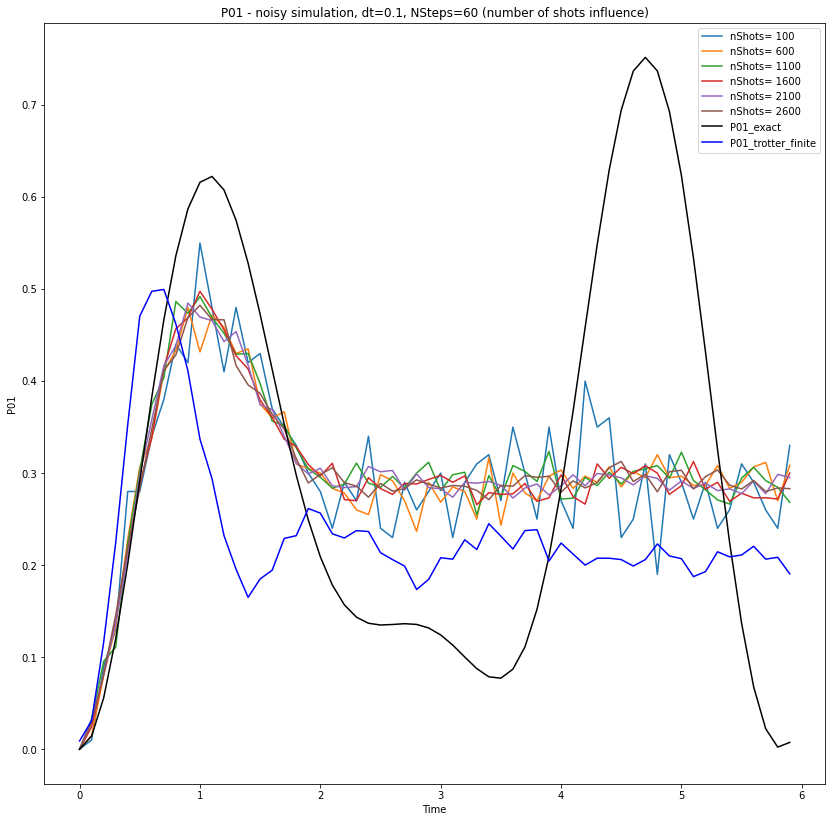

In [41]:
#### Finite measurements statistics on a quantum computer simulator (with T1 and T2 thermal relaxation)

# time step
dt = 0.1
# number of time steps
NSteps=60
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 100
step_Shots = 500
nCalc = 6

t1_0 = 50e3
t1_1 = 50e3
t2_0 = 50e3
t2_1 = 50e3
t_step = 10e3

Time = dt*np.arange(0,NSteps,1)

for i in range(nCalc):
    circ_list = []
    P01_trotter_finite_sim_noise = []

    for j in range(NSteps):
        circ = QuantumCircuit(2,2) # initialize a quantum circuit
        circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
        circ.z(q)
        circ.measure(range(2),range(2)) # mesure 
        circ_list.append(circ)


    # T1 and T2 values for qubits 0-1
    T1s = np.array([t1_0, t1_1]) # nanosec
    T2s = np.array([t2_0, t2_1])  # nanosec


    # Instruction times (in nanoseconds)
    time_u1 = 0   # virtual gate
    time_u2 = 50  # (single X90 pulse)
    time_u3 = 100 # (two X90 pulses)
    time_cx = 300
    time_reset = 1000  # 1 microsecond
    time_measure = 1000 # 1 microsecond

    # QuantumError objects
    errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                    for t1, t2 in zip(T1s, T2s)]
    errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                      for t1, t2 in zip(T1s, T2s)]
    errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
                  for t1, t2 in zip(T1s, T2s)]
    errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
                  for t1, t2 in zip(T1s, T2s)]
    errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
                  for t1, t2 in zip(T1s, T2s)]
    errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
                 thermal_relaxation_error(t1b, t2b, time_cx))
                  for t1a, t2a in zip(T1s, T2s)]
                   for t1b, t2b in zip(T1s, T2s)]

    # Add errors to noise model
    noise_thermal = NoiseModel()
    for j in range(2):
        noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
        noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
        noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
        noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
        noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
        for k in range(2):
            noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

    #print(noise_thermal)

    # Run the noisy simulation
    sim_thermal = AerSimulator(noise_model=noise_thermal)

    # Transpile circuit for noisy basis gates
    circ_tthermal = transpile(circ_list, sim_thermal)

    # Run and get counts
    result_thermal = sim_thermal.run(circ_tthermal, shots=nShots).result()
    counts_thermal = result_thermal.get_counts()
    #print(counts_thermal)

    for k in range(NSteps):
        count_var = counts_thermal[k]
        try:
            var = count_var.get('10')
            P01_trotter_finite_sim_noise.append((1.0/nShots)*var)
        except:
            P01_trotter_finite_sim_noise.append(0)

    print('\nProbability 01 = ', P01_trotter_finite_sim_noise)

    lab = 'nShots= ' + str(nShots)
    plt.rcParams["figure.figsize"] = (14,14)
    plt.plot(Time, P01_trotter_finite_sim_noise, label=lab)
    
    nShots += step_Shots



plt.title('P01 - noisy simulation, dt=0.1, NSteps=60 (number of shots influence)')
plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite')
plt.xlabel('Time')
plt.ylabel('P01')
plt.legend()
plt.show()

[{'00': 1921, '01': 61, '10': 18}, {'00': 1822, '01': 84, '10': 62, '11': 32}, {'00': 1571, '01': 138, '10': 232, '11': 59}, {'00': 1318, '01': 147, '10': 449, '11': 86}, {'00': 998, '01': 191, '10': 705, '11': 106}, {'00': 671, '01': 239, '10': 941, '11': 149}, {'00': 476, '01': 349, '10': 995, '11': 180}, {'00': 381, '01': 395, '10': 999, '11': 225}, {'00': 295, '01': 498, '10': 924, '11': 283}, {'00': 319, '01': 525, '10': 822, '11': 334}, {'00': 368, '01': 605, '10': 674, '11': 353}, {'00': 405, '01': 589, '10': 588, '11': 418}, {'00': 454, '01': 624, '10': 464, '11': 458}, {'00': 514, '01': 604, '10': 391, '11': 491}, {'00': 567, '01': 582, '10': 330, '11': 521}, {'00': 529, '01': 554, '10': 370, '11': 547}, {'00': 503, '01': 505, '10': 389, '11': 603}, {'00': 510, '01': 494, '10': 458, '11': 538}, {'00': 474, '01': 510, '10': 464, '11': 552}, {'00': 419, '01': 468, '10': 523, '11': 590}, {'00': 424, '01': 473, '10': 513, '11': 590}, {'00': 440, '01': 510, '10': 468, '11': 582}, {

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model\nExact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (NSteps=60)')

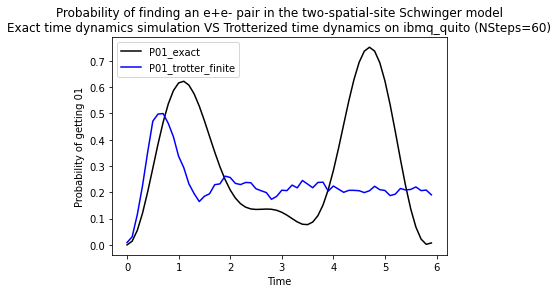

In [37]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.1)
# time step
dt = 0.1
# number of time steps
NSteps=60
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 2000

circ_list = []
P01_trotter_finite_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n'
         'Exact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (NSteps=60)')


Total time= 36.51978254318237

Probability 01 =  [0.002, 0.014, 0.06, 0.146, 0.23, 0.28200000000000003, 0.404, 0.424, 0.434, 0.452, 0.41000000000000003, 0.404, 0.35000000000000003, 0.342, 0.308, 0.28600000000000003, 0.24, 0.226, 0.244, 0.19, 0.19, 0.186, 0.186, 0.222, 0.20400000000000001, 0.214, 0.26, 0.26, 0.232, 0.25, 0.23, 0.224, 0.244, 0.242, 0.2, 0.23800000000000002, 0.21, 0.244, 0.24, 0.244]


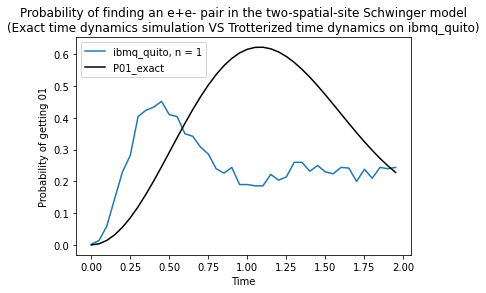

In [41]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.1)
# time step
dt = 0.05
# number of time steps
NSteps=40
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

# number of run on quito
nRuns = 1
n = 1 

for i in range(nRuns):
    circ_list = []
    P01_trotter_finite_quito = []

    # Select a backend device 
    backend = provider.get_backend('ibmq_quito')

    # run 20 time steps

    for j in range(NSteps):
        circ = QuantumCircuit(2,2) # initialize a quantum circuit
        circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
        circ.z(q)
        circ.measure(range(2),range(2)) # mesure 
        circ_list.append(circ)

    timer_1_sim = time.time()
    job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
    result = job.result() # collect run results
    count = result.get_counts()
    #print(count)

    for k in range(NSteps):
        count_var = count[k]
        try:
            var = count_var.get('10')
            P01_trotter_finite_quito.append((1.0/nShots)*var)
        except:
            P01_trotter_finite_quito.append(0)

    time_1_sim = time.time() - timer_1_sim
    print('\nTotal time=', time_1_sim)
    print('\nProbability 01 = ', P01_trotter_finite_quito)


    Time = dt*np.arange(0,NSteps,1)

    lab = 'ibmq_quito, n = ' + str(n)
    #plt.rcParams["figure.figsize"] = (14,14)
    plt.plot(Time, P01_trotter_finite_quito, label=lab)
    
    n+=1

plt.plot(Time, P01_exact_small, 'black', label='P01_exact')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n'
          '(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_quito)')
plt.show()



[{'00': 1965, '01': 25, '10': 10}, {'00': 1184, '01': 65, '10': 725, '11': 26}, {'00': 447, '01': 182, '10': 1290, '11': 81}, {'00': 382, '01': 566, '10': 822, '11': 230}]

Total time= 15.983179330825806

Probability 01 =  [0.005, 0.3625, 0.645, 0.41100000000000003]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model\nExact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (NSteps=60)')

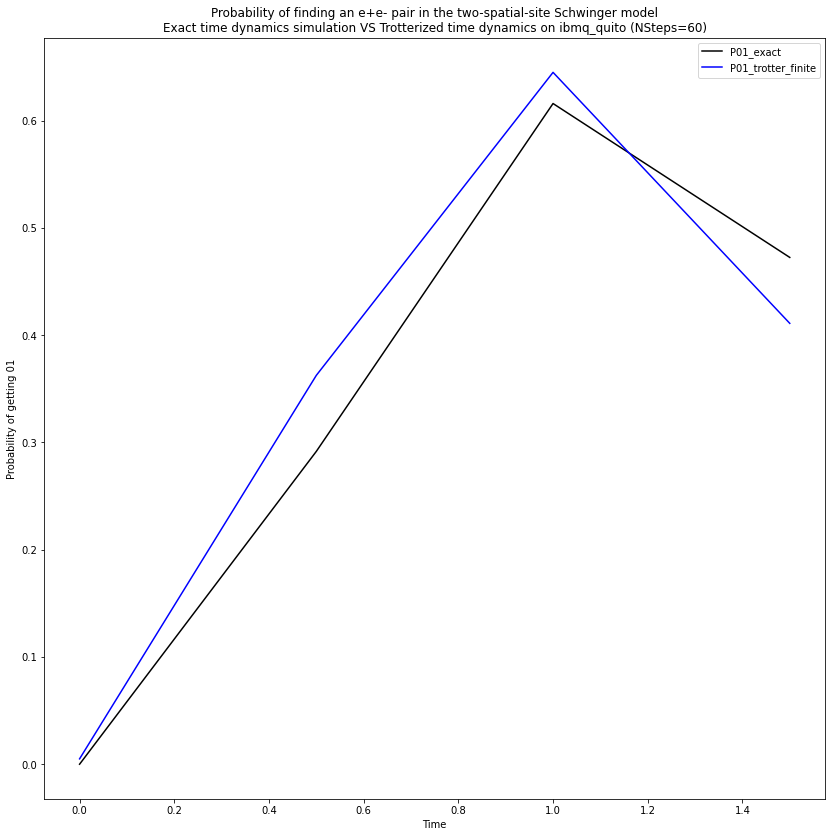

In [30]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.5)
# time step
dt = 0.5
# number of time steps
NSteps=4
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 2000

circ_list = []
P01_trotter_finite_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_large, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n'
         'Exact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (NSteps=60)')

[{'00': 1952, '01': 29, '10': 19}, {'00': 1669, '01': 108, '10': 196, '11': 27}, {'00': 1169, '01': 176, '10': 577, '11': 78}, {'00': 846, '01': 199, '10': 865, '11': 90}, {'00': 496, '01': 322, '10': 1031, '11': 151}, {'00': 349, '01': 429, '10': 1003, '11': 219}, {'00': 369, '01': 552, '10': 825, '11': 254}, {'00': 454, '01': 596, '10': 646, '11': 304}, {'00': 529, '01': 608, '10': 545, '11': 318}, {'00': 586, '01': 588, '10': 439, '11': 387}]

Total time= 25.613445043563843

Probability 01 =  [0.0095, 0.098, 0.2885, 0.4325, 0.5155, 0.5015000000000001, 0.41250000000000003, 0.323, 0.2725, 0.2195]


Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model\nExact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (NSteps=60)')

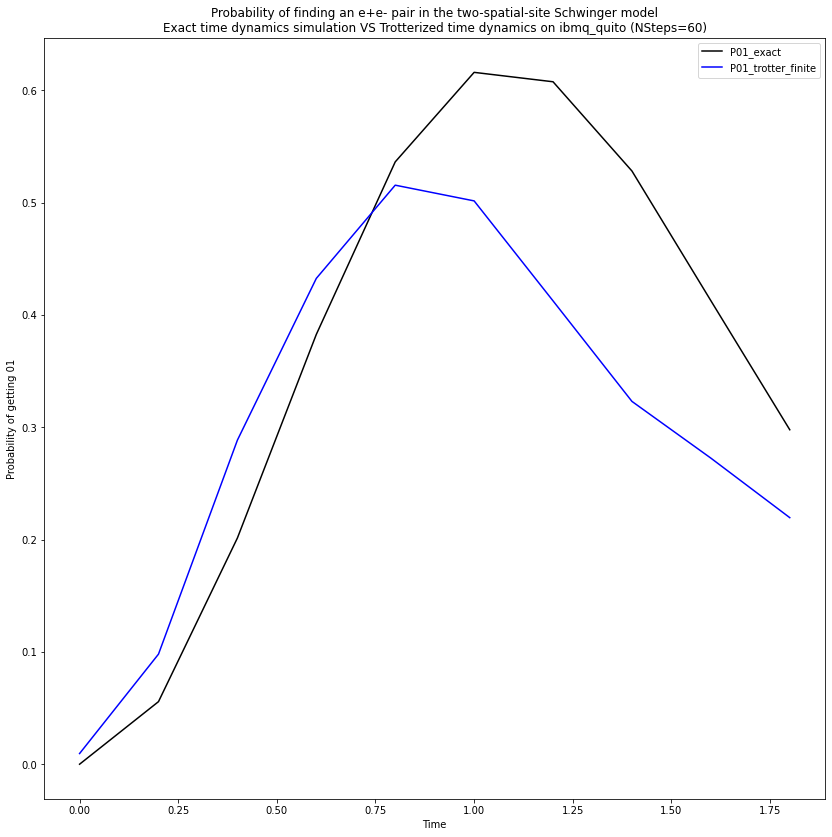

In [33]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.5)
# time step
dt = 0.2
# number of time steps
NSteps=10
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 2000

circ_list = []
P01_trotter_finite_sim = []

# Select a backend device 
backend = provider.get_backend('ibmq_quito')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1_sim = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_sim.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_sim.append(0)
      
time_1_sim = time.time() - timer_1_sim
print('\nTotal time=', time_1_sim)
print('\nProbability 01 = ', P01_trotter_finite_sim)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_large, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_sim, 'blue', label='P01_trotter_finite')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n'
         'Exact time dynamics simulation VS Trotterized time dynamics on ibmq_quito (NSteps=60)')


Total time= 514.0626649856567

Probability 01 =  [0.009000000000000001, 0.025, 0.066, 0.14300000000000002, 0.14400000000000002, 0.189, 0.255, 0.268, 0.295, 0.324, 0.326, 0.313, 0.28700000000000003, 0.301, 0.25, 0.276, 0.267, 0.213, 0.231, 0.217, 0.225, 0.20500000000000002, 0.20700000000000002, 0.21, 0.20600000000000002, 0.219, 0.2, 0.198, 0.22, 0.212, 0.225, 0.20400000000000001, 0.22, 0.186, 0.197, 0.20700000000000002, 0.20400000000000001, 0.20500000000000002, 0.20600000000000002, 0.203, 0.20800000000000002, 0.225, 0.20800000000000002, 0.209, 0.20500000000000002, 0.213, 0.209, 0.181, 0.231, 0.214]

Total time= 645.2292540073395

Probability 01 =  [0.008, 0.034, 0.08600000000000001, 0.165, 0.245, 0.289, 0.323, 0.341, 0.312, 0.289, 0.269, 0.256, 0.228, 0.219, 0.188, 0.179, 0.193, 0.199, 0.219, 0.213, 0.191, 0.20700000000000002, 0.19, 0.197, 0.20500000000000002]

Total time= 625.5510141849518

Probability 01 =  [0.006, 0.039, 0.133, 0.258, 0.325, 0.353, 0.359, 0.35100000000000003, 0.328,

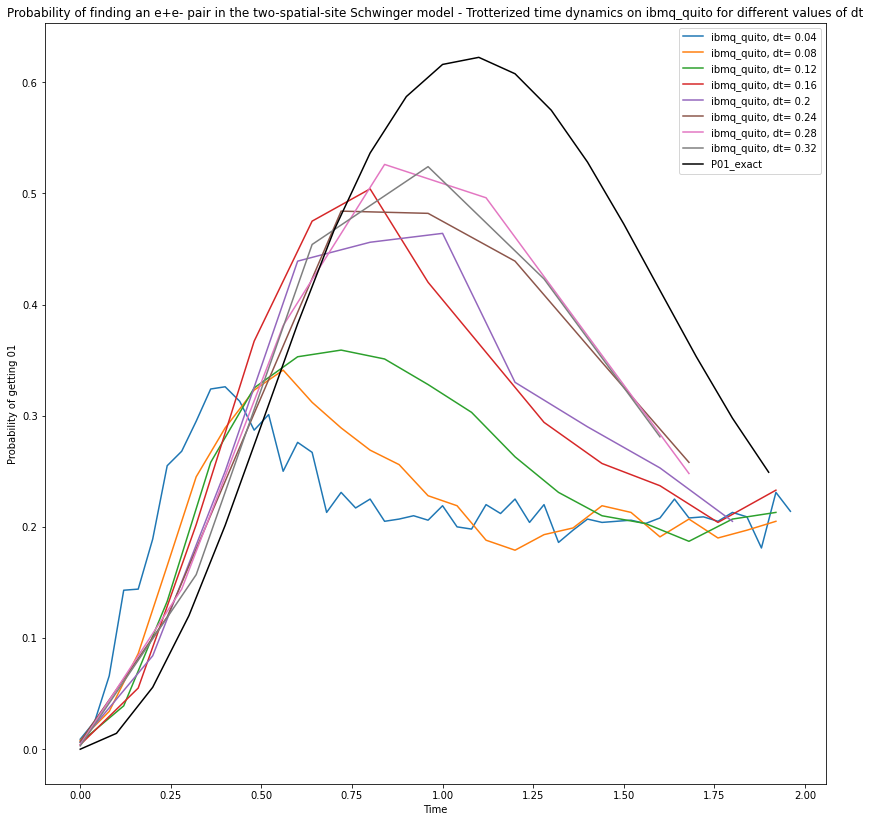

In [7]:
#### Finite measurements statistics on a quantum computer (ibmq_quito / dt=0.1)
# time step
dt = 0.04
# number of time steps
NSteps=50
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 1000

# number of run 
nRuns = 8

for i in range(nRuns):
    
    circ_list = []
    P01_trotter_finite_quito = []

    # Select a backend device 
    backend = provider.get_backend('ibmq_quito')

    # run 20 time steps

    for j in range(NSteps):
        circ = QuantumCircuit(2,2) # initialize a quantum circuit
        circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
        circ.z(q)
        circ.measure(range(2),range(2)) # mesure 
        circ_list.append(circ)

    timer_1_sim = time.time()
    job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
    result = job.result() # collect run results
    count = result.get_counts()
    #print(count)

    for k in range(NSteps):
        count_var = count[k]
        try:
            var = count_var.get('10')
            P01_trotter_finite_quito.append((1.0/nShots)*var)
        except:
            P01_trotter_finite_quito.append(0)

    time_1_sim = time.time() - timer_1_sim
    print('\nTotal time=', time_1_sim)
    print('\nProbability 01 = ', P01_trotter_finite_quito)


    Time = dt*np.arange(0,round(NSteps),1)

    lab = 'ibmq_quito, dt= ' + str(round(dt, 3))
    plt.rcParams["figure.figsize"] = (14,14)
    plt.plot(Time, P01_trotter_finite_quito, label=lab)
    
    dt_var=dt
    dt+=0.04
    NSteps=round(NSteps*(dt_var/dt))

dt = 0.1
NSteps = 20
Time = dt*np.arange(0,NSteps,1)
plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model - '
          'Trotterized time dynamics on ibmq_quito for different values of dt')
plt.show()

[{'00': 476, '01': 8, '10': 16}, {'00': 432, '01': 21, '10': 36, '11': 11}, {'00': 376, '01': 39, '10': 60, '11': 25}, {'00': 282, '01': 62, '10': 108, '11': 48}, {'00': 241, '01': 79, '10': 131, '11': 49}, {'00': 203, '01': 83, '10': 158, '11': 56}, {'00': 166, '01': 98, '10': 166, '11': 70}, {'00': 129, '01': 117, '10': 176, '11': 78}, {'00': 122, '01': 111, '10': 168, '11': 99}, {'00': 96, '01': 112, '10': 182, '11': 110}, {'00': 123, '01': 110, '10': 162, '11': 105}, {'00': 104, '01': 123, '10': 176, '11': 97}, {'00': 129, '01': 126, '10': 148, '11': 97}, {'00': 138, '01': 116, '10': 137, '11': 109}, {'00': 114, '01': 130, '10': 133, '11': 123}, {'00': 133, '01': 125, '10': 137, '11': 105}, {'00': 121, '01': 113, '10': 149, '11': 117}, {'00': 144, '01': 100, '10': 117, '11': 139}, {'00': 139, '01': 122, '10': 116, '11': 123}, {'00': 148, '01': 120, '10': 120, '11': 112}]

Total time= 447.19857931137085

Probability 01 =  [0.032, 0.07200000000000001, 0.12, 0.216, 0.262, 0.316, 0.332

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_belem)')

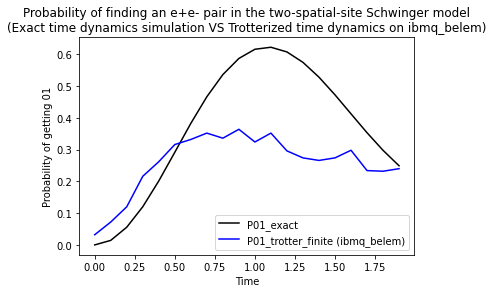

In [8]:
#### Finite measurements statistics on a quantum computer (ibmq_belem / dt=0.1)
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_belem = []

# Select a backend device 
backend = provider.get_backend('ibmq_belem')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1 = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_belem.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_belem.append(0)
      
time_1 = time.time() - timer_1
print('\nTotal time=', time_1)
print('\nProbability 01 = ', P01_trotter_finite_belem)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_belem, 'blue', label='P01_trotter_finite (ibmq_belem)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n'
           '(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_belem)')

[{'00': 473, '01': 17, '10': 10}, {'00': 462, '01': 13, '10': 21, '11': 4}, {'00': 434, '01': 22, '10': 29, '11': 15}, {'00': 410, '01': 23, '10': 56, '11': 11}, {'00': 362, '01': 40, '10': 74, '11': 24}, {'00': 333, '01': 43, '10': 110, '11': 14}, {'00': 278, '01': 48, '10': 140, '11': 34}, {'00': 281, '01': 43, '10': 146, '11': 30}, {'00': 240, '01': 53, '10': 165, '11': 42}, {'00': 243, '01': 50, '10': 160, '11': 47}, {'00': 207, '01': 71, '10': 178, '11': 44}, {'00': 214, '01': 73, '10': 162, '11': 51}, {'00': 195, '01': 68, '10': 166, '11': 71}, {'00': 199, '01': 61, '10': 176, '11': 64}, {'00': 210, '01': 76, '10': 143, '11': 71}, {'00': 180, '01': 92, '10': 157, '11': 71}, {'00': 171, '01': 89, '10': 147, '11': 93}, {'00': 188, '01': 81, '10': 137, '11': 94}, {'00': 212, '01': 90, '10': 113, '11': 85}, {'00': 201, '01': 95, '10': 111, '11': 93}]

Total time= 68.17498087882996

Probability 01 =  [0.02, 0.042, 0.058, 0.112, 0.148, 0.22, 0.28, 0.292, 0.33, 0.32, 0.356, 0.324, 0.332

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_manila)')

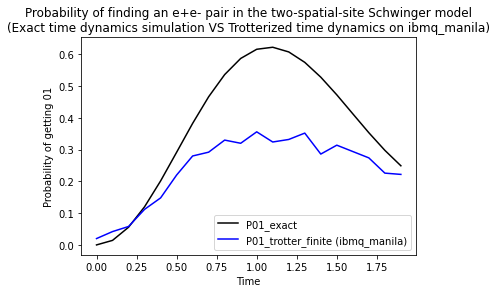

In [8]:
#### Finite measurements statistics on a quantum computer (ibmq_manila / dt=0.1)
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_manila = []

# Select a backend device 
backend = provider.get_backend('ibmq_manila')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1 = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_manila.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_manila.append(0)
      
time_1 = time.time() - timer_1
print('\nTotal time=', time_1)
print('\nProbability 01 = ', P01_trotter_finite_manila)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_manila, 'blue', label='P01_trotter_finite (ibmq_manila)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n'
           '(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_manila)')

[{'00': 482, '01': 13, '10': 5}, {'00': 473, '01': 19, '10': 8}, {'00': 449, '01': 23, '10': 24, '11': 4}, {'00': 437, '01': 25, '10': 30, '11': 8}, {'00': 405, '01': 36, '10': 48, '11': 11}, {'00': 373, '01': 47, '10': 66, '11': 14}, {'00': 355, '01': 60, '10': 67, '11': 18}, {'00': 357, '01': 54, '10': 72, '11': 17}, {'00': 289, '01': 70, '10': 123, '11': 18}, {'00': 308, '01': 55, '10': 103, '11': 34}, {'00': 287, '01': 65, '10': 108, '11': 40}, {'00': 244, '01': 70, '10': 149, '11': 37}, {'00': 253, '01': 79, '10': 130, '11': 38}, {'00': 241, '01': 84, '10': 131, '11': 44}, {'00': 244, '01': 75, '10': 136, '11': 45}, {'00': 237, '01': 79, '10': 139, '11': 45}, {'00': 217, '01': 93, '10': 142, '11': 48}, {'00': 195, '01': 98, '10': 137, '11': 70}, {'00': 195, '01': 113, '10': 137, '11': 55}, {'00': 192, '01': 100, '10': 147, '11': 61}]

Total time= 43.5541718006134

Probability 01 =  [0.01, 0.016, 0.048, 0.06, 0.096, 0.132, 0.134, 0.14400000000000002, 0.246, 0.20600000000000002, 0.2

Text(0.5, 1.0, 'Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_lima)')

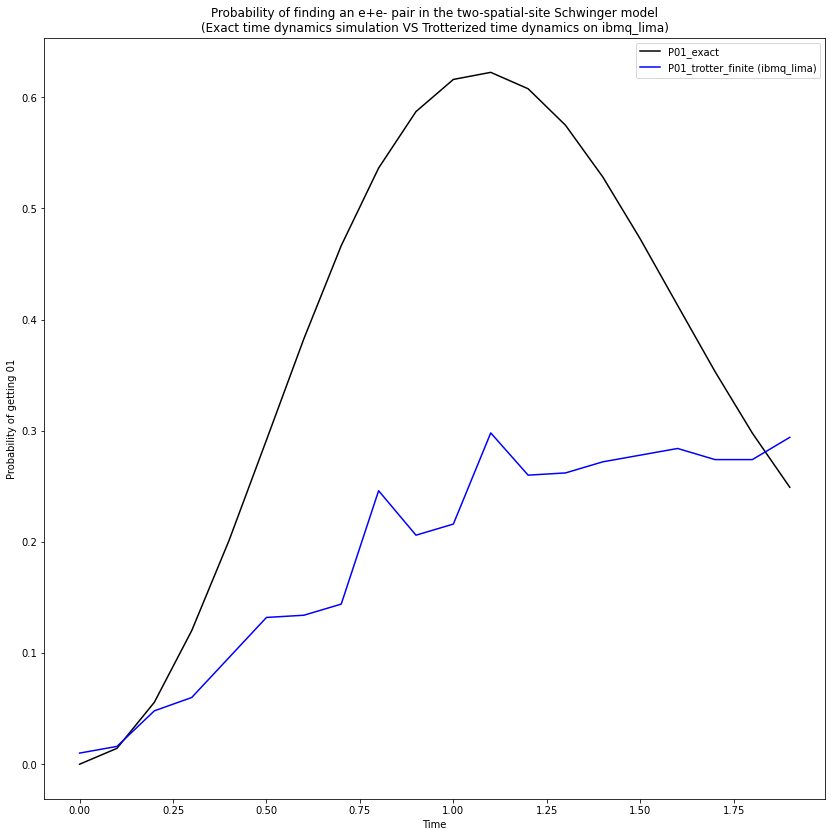

In [11]:
#### Finite measurements statistics on a quantum computer (ibmq_lima / dt=0.1)
# time step
dt = 0.1
# number of time steps
NSteps=20
nSteps=[n for n in range(NSteps)]
# number of measurements per task
nShots = 500

circ_list = []
P01_trotter_finite_melbourne = []

# Select a backend device 
backend = provider.get_backend('ibmq_lima')

# run 20 time steps

for j in range(NSteps):
    circ = QuantumCircuit(2,2) # initialize a quantum circuit
    circ = U_approx(circ, dt, nSteps[j], q) # append the trotterized time dynamics circuit
    circ.z(q)
    circ.measure(range(2),range(2)) # mesure 
    circ_list.append(circ)

timer_1 = time.time()
job = execute(circ_list, backend, shots=nShots) # creation a quantum task and run 
result = job.result() # collect run results
count = result.get_counts()
print(count)

for k in range(NSteps):
    count_var = count[k]
    try:
        var = count_var.get('10')
        P01_trotter_finite_melbourne.append((1.0/nShots)*var)
    except:
        P01_trotter_finite_melbourne.append(0)
      
time_1 = time.time() - timer_1
print('\nTotal time=', time_1)
print('\nProbability 01 = ', P01_trotter_finite_melbourne)


Time = dt*np.arange(0,NSteps,1)

plt.plot(Time, P01_exact_med, 'black', label='P01_exact')
plt.plot(Time, P01_trotter_finite_melbourne, 'blue', label='P01_trotter_finite (ibmq_lima)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Probability of getting 01')
plt.title('Probability of finding an e+e- pair in the two-spatial-site Schwinger model\n'
           '(Exact time dynamics simulation VS Trotterized time dynamics on ibmq_lima)')